In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
excel_file_path = 'Quarterly_information.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [41]:
# Display the keys (worksheet names) in the dictionary
print("Worksheet names:", list(all_dfs.keys()))

Worksheet names: ['fund_profile', 'fund_profile_merged', 'fund_profile_non_merged', 'investment_performance', 'investment_performance_merged', 'investment_non_merged', 'mysuper_fees', 'mysuper_fees_merged', 'mysuper_fees_non_merged', 'admin_fees', 'admin_fees_merged', 'admin_fees_non_merged', 'activity_fees', 'activity_fees_merged', 'activity_fees_non_merged']


In [42]:
fees = all_dfs['investment_performance_merged']

In [43]:
fees.columns

Index(['Period', 'MySuper product name', 'Fund name', 'Fund ABN', 'Merger',
       'Merged', 'MySuper product type', 'Fund trustee',
       'Fund public offer status', 'Fund type',
       'Return target (annualised target net return above CPI over ten years) ',
       'Level of investment risk (estimated number of negative net investment returns over a 20 year period)',
       'Level of investment risk label', 'Statement of fees and other costs ',
       'Investment fees', 'Unnamed: 15', 'Investment fees \n(rep member)',
       'Investment costs - indirect cost ratio (ICR)', 'Unnamed: 18',
       'Investment costs - indirect cost ratio (ICR)\n (rep member)',
       'Investment costs - other', 'Unnamed: 21',
       'Investment costs - other\n (rep member)',
       'Total investment fees and costs\n (rep member)\n',
       'Taxes on investment income after investment fees and costs',
       'Unnamed: 25',
       'Taxes on investment income after investment fees and costs\n (rep member)',

In [44]:
# Create a new DataFrame with the selected columns
selected_columns = ['Period', 'MySuper product name', 'Fund name', 'Fund ABN', 'Merger',
       'Merged', 'Administration fees\n (rep member)','Total investment fees and costs\n (rep member)\n' ]
fees = fees[selected_columns].copy()

# Print or use the new DataFrame 'new_fund_profile'
print(fees)

        Period     MySuper product name                     Fund name  \
0   2014-06-30                  MySuper                   Prime Super   
1   2022-12-31        UniSuper Balanced                      Unisuper   
2   2022-06-30  AustralianSuper MySuper               AustralianSuper   
3   2022-06-30          Balanced option  HOSTPLUS Superannuation Fund   
4   2021-12-31  AustralianSuper MySuper               AustralianSuper   
..         ...                      ...                           ...   
946 2020-03-31       Balanced (MySuper)                  Spirit Super   
947 2020-06-30       Balanced (MySuper)                  Spirit Super   
948 2020-09-30       Balanced (MySuper)                  Spirit Super   
949 2020-12-31       Balanced (MySuper)                  Spirit Super   
950 2021-03-31       Balanced (MySuper)                  Spirit Super   

        Fund ABN  Merger  Merged  Administration fees\n (rep member)  \
0    60562335823       1       0                   

In [45]:
fees

,Period,MySuper product name,Fund name,Fund ABN,Merger,Merged,Administration fees\n (rep member),Total investment fees and costs\n (rep member)\n
0,2014-06-30,MySuper,Prime Super,60562335823,1,0,0.16,0.17
1,2022-12-31,UniSuper Balanced,Unisuper,91385943850,1,0,0.05,0.12
2,2022-06-30,AustralianSuper MySuper,AustralianSuper,65714394898,1,0,0.07,0.21
3,2022-06-30,Balanced option,HOSTPLUS Superannuation Fund,68657495890,1,0,0.06,0.25
4,2021-12-31,AustralianSuper MySuper,AustralianSuper,65714394898,1,0,0.06,0.20
...,...,...,...,...,...,...,...,...
946,2020-03-31,Balanced (MySuper),Spirit Super,74559365913,0,0,0.04,0.18
947,2020-06-30,Balanced (MySuper),Spirit Super,74559365913,0,0,0.04,0.29
948,2020-09-30,Balanced (MySuper),Spirit Super,74559365913,0,0,0.04,0.15
949,2020-12-31,Balanced (MySuper),Spirit Super,74559365913,0,0,0.04,0.12


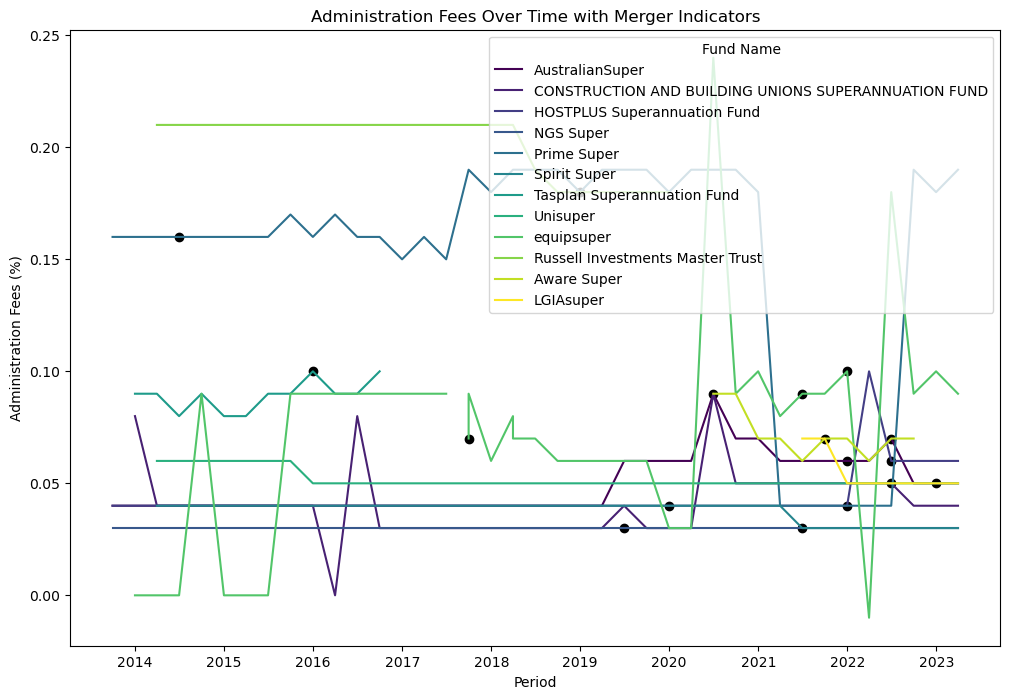

In [46]:
# Filter the DataFrame to only include funds that have had at least one merger
funds_with_merger = fees[fees['Merger'] == 1]['Fund name'].unique()
filtered_fees = fees[fees['Fund name'].isin(funds_with_merger)]

# Sort the DataFrame for better visualization
filtered_fees = filtered_fees.sort_values(['Period', 'Fund name'])

# Create a color map for unique Fund names
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_fees['Fund name'].unique())))

# Create a dictionary to map Fund names to colors
fund_color_map = {fund: color for fund, color in zip(filtered_fees['Fund name'].unique(), colors)}

# Create the plot
plt.figure(figsize=(12, 8))

# Loop through each unique fund name and plot its fees over time
for fund_name, color in fund_color_map.items():
    fund_data = filtered_fees[filtered_fees['Fund name'] == fund_name]
    plt.plot(fund_data['Period'], fund_data['Administration fees\n (rep member)'], label=fund_name, color=color)
    
    # Overlay a black dot where Merger = 1
    merger_data = fund_data[fund_data['Merger'] == 1]
    plt.scatter(merger_data['Period'], merger_data['Administration fees\n (rep member)'], color='black')

# Create a custom legend with no duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Fund Name')

# Label the axes
plt.xlabel('Period')
plt.ylabel('Administration Fees (%)')
plt.title('Administration Fees Over Time with Merger Indicators')

# Show the plot
plt.show()


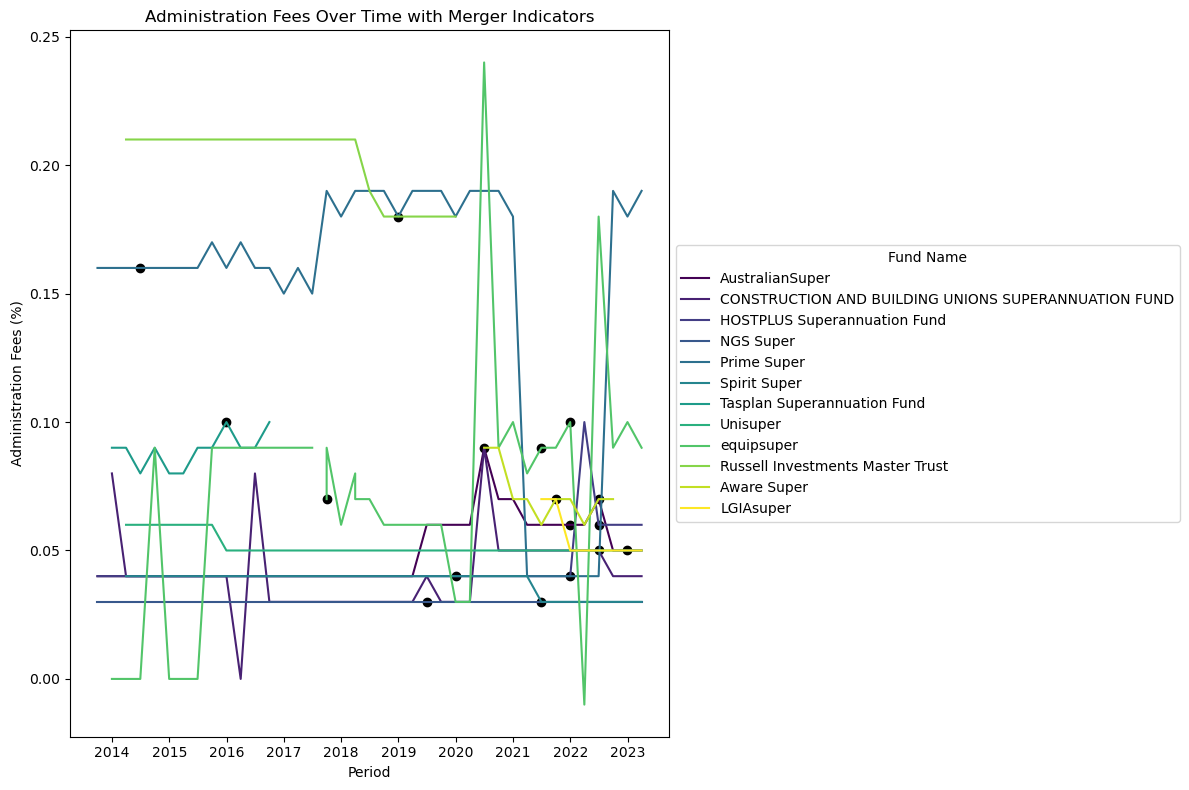

In [47]:
# Filter the DataFrame to only include funds that have had at least one merger
funds_with_merger = fees[fees['Merger'] == 1]['Fund name'].unique()
filtered_fees = fees[fees['Fund name'].isin(funds_with_merger)]

# Sort the DataFrame for better visualization
filtered_fees = filtered_fees.sort_values(['Period', 'Fund name'])

# Create a color map for unique Fund names
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_fees['Fund name'].unique())))

# Create a dictionary to map Fund names to colors
fund_color_map = {fund: color for fund, color in zip(filtered_fees['Fund name'].unique(), colors)}

# Create the plot
plt.figure(figsize=(12, 8))

# Loop through each unique fund name and plot its fees over time
for fund_name, color in fund_color_map.items():
    fund_data = filtered_fees[filtered_fees['Fund name'] == fund_name]
    plt.plot(fund_data['Period'], fund_data['Administration fees\n (rep member)'], label=fund_name, color=color)
    
    # Overlay a black dot where Merger = 1
    merger_data = fund_data[fund_data['Merger'] == 1]
    plt.scatter(merger_data['Period'], merger_data['Administration fees\n (rep member)'], color='black')

# Create a custom legend with no duplicate labels and place it to the right of the graph
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Fund Name', loc='center left', bbox_to_anchor=(1, 0.5))

# Label the axes
plt.xlabel('Period')
plt.ylabel('Administration Fees (%)')
plt.title('Administration Fees Over Time with Merger Indicators')

# Adjust the plot layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()


Calculating the average admin fees for merged funds vs funds that havent undergone a merger

In [48]:
all_fees = all_dfs['investment_non_merged']

In [49]:
# Create a new DataFrame with the selected columns
selected_columns = ['Period', 'MySuper product name', 'Fund name', 'Fund ABN', 'Administration fees\n (rep member)','Total investment fees and costs\n (rep member)\n' ]
all_fees = all_fees[selected_columns].copy()

# Print or use the new DataFrame 'new_fund_profile'
print(all_fees)

         Period      MySuper product name  \
0    2013-09-30          AMP MySuper No.1   
1    2013-09-30   Balanced (accumulation)   
2    2013-09-30             AMIST MySuper   
3    2013-09-30  AvSuper Growth (MySuper)   
4    2013-09-30    MySuper Default Option   
...         ...                       ...   
1694 2023-03-31  MySuper Passive Balanced   
1695 2023-03-31    PSSap MySuper Balanced   
1696 2023-03-31                  Balanced   
1697 2023-03-31                REST Super   
1698 2023-03-31        Balanced (MySuper)   

                                           Fund name     Fund ABN  \
0                               AMP Retirement Trust  73310248809   
1      Australian Ethical Retail Superannuation Fund  49633667743   
2      Australian Meat Industry Superannuation Trust  28342064803   
3                                       AvSuper Fund  84421446069   
4                   BHP Billiton Superannuation Fund  30187082512   
...                                          

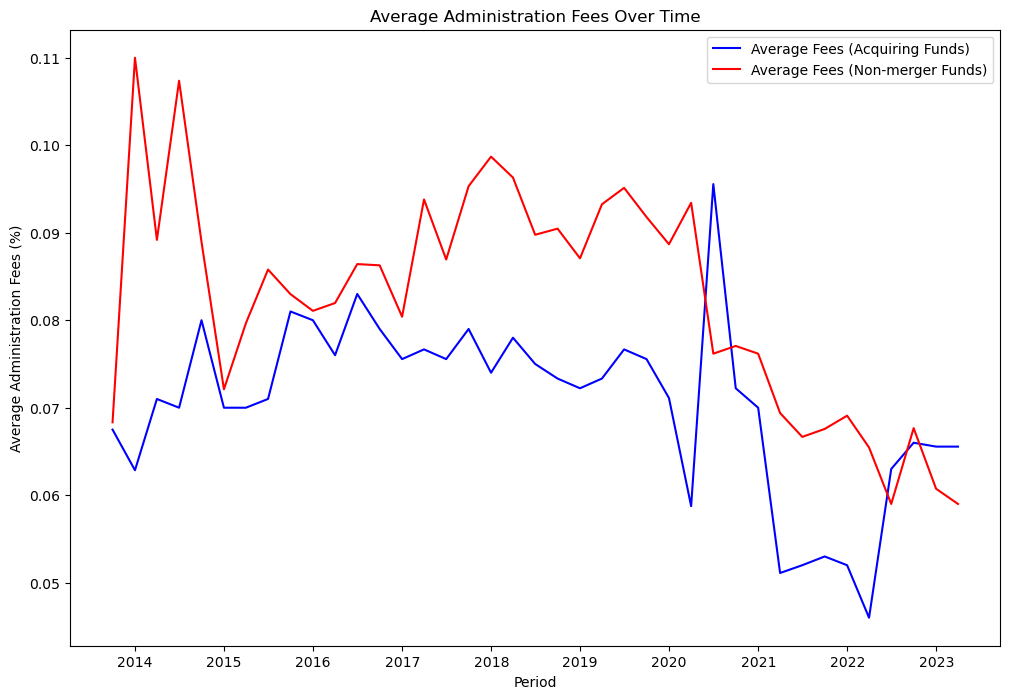

In [50]:
# Filter the 'fees' DataFrame to only include funds that have had at least one merger
funds_with_merger = fees[fees['Merger'] == 1]['Fund name'].unique()
merged_fees = fees[fees['Fund name'].isin(funds_with_merger)]

# Calculate average administration fees for funds that have undergone a merger
avg_merged_fees = merged_fees.groupby('Period')['Administration fees\n (rep member)'].mean()

# Calculate average administration fees for all funds in 'all_fees'
avg_all_fees = all_fees.groupby('Period')['Administration fees\n (rep member)'].mean()

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the average administration fees
plt.plot(avg_merged_fees.index, avg_merged_fees.values, label='Average Fees (Acquiring Funds)', color='blue')
plt.plot(avg_all_fees.index, avg_all_fees.values, label='Average Fees (Non-merger Funds)', color='red')

# Label the axes and the plot
plt.xlabel('Period')
plt.ylabel('Average Administration Fees (%)')
plt.title('Average Administration Fees Over Time')
plt.legend()

# Show the plot
plt.show()


Investment fees

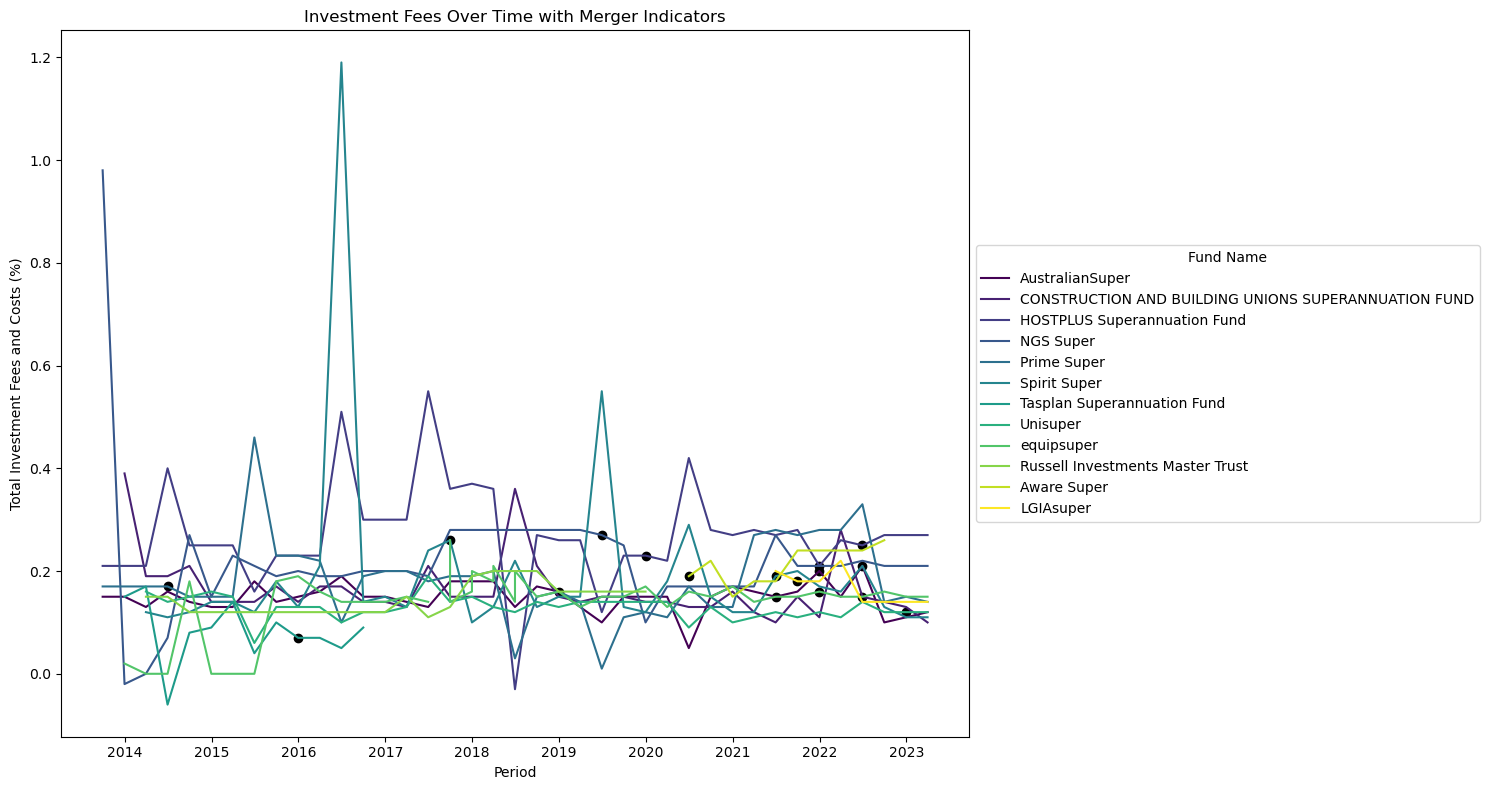

In [51]:
# Filter the DataFrame to only include funds that have had at least one merger
funds_with_merger = fees[fees['Merger'] == 1]['Fund name'].unique()
filtered_fees = fees[fees['Fund name'].isin(funds_with_merger)]

# Sort the DataFrame for better visualization
filtered_fees = filtered_fees.sort_values(['Period', 'Fund name'])

# Create a color map for unique Fund names
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_fees['Fund name'].unique())))

# Create a dictionary to map Fund names to colors
fund_color_map = {fund: color for fund, color in zip(filtered_fees['Fund name'].unique(), colors)}

# Create the plot
plt.figure(figsize=(15, 8))

# Loop through each unique fund name and plot its investment fees over time
for fund_name, color in fund_color_map.items():
    fund_data = filtered_fees[filtered_fees['Fund name'] == fund_name]
    plt.plot(fund_data['Period'], fund_data['Total investment fees and costs\n (rep member)\n'], label=fund_name, color=color)
    
    # Overlay a black dot where Merger = 1
    merger_data = fund_data[fund_data['Merger'] == 1]
    plt.scatter(merger_data['Period'], merger_data['Total investment fees and costs\n (rep member)\n'], color='black')

# Create a custom legend with no duplicate labels and place it to the right of the graph
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Fund Name', loc='center left', bbox_to_anchor=(1, 0.5))

# Label the axes
plt.xlabel('Period')
plt.ylabel('Total Investment Fees and Costs (%)')
plt.title('Investment Fees Over Time with Merger Indicators')

# Adjust the plot layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()


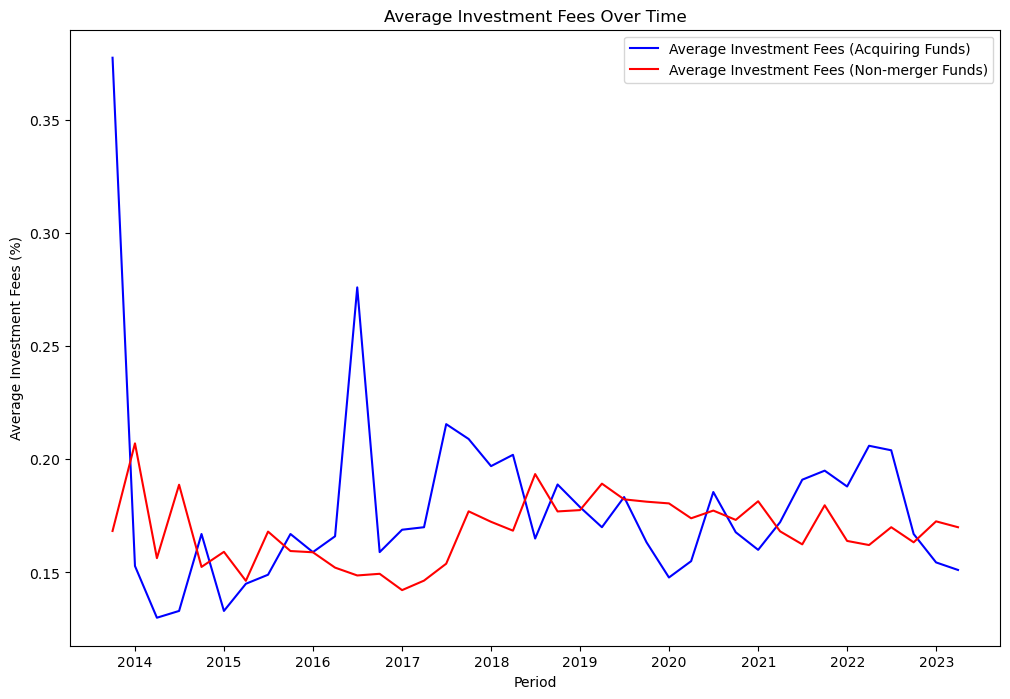

In [52]:
# Filter the 'fees' DataFrame to only include funds that have had at least one merger
funds_with_merger = fees[fees['Merger'] == 1]['Fund name'].unique()
merged_fees = fees[fees['Fund name'].isin(funds_with_merger)]

# Calculate average investment fees for funds that have undergone a merger
avg_merged_fees = merged_fees.groupby('Period')['Total investment fees and costs\n (rep member)\n'].mean()

# Calculate average investment fees for all funds in 'all_fees'
avg_all_fees = all_fees.groupby('Period')['Total investment fees and costs\n (rep member)\n'].mean()

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the average investment fees
plt.plot(avg_merged_fees.index, avg_merged_fees.values, label='Average Investment Fees (Acquiring Funds)', color='blue')
plt.plot(avg_all_fees.index, avg_all_fees.values, label='Average Investment Fees (Non-merger Funds)', color='red')

# Label the axes and the plot
plt.xlabel('Period')
plt.ylabel('Average Investment Fees (%)')
plt.title('Average Investment Fees Over Time')
plt.legend()

# Show the plot
plt.show()


Additional Plotting

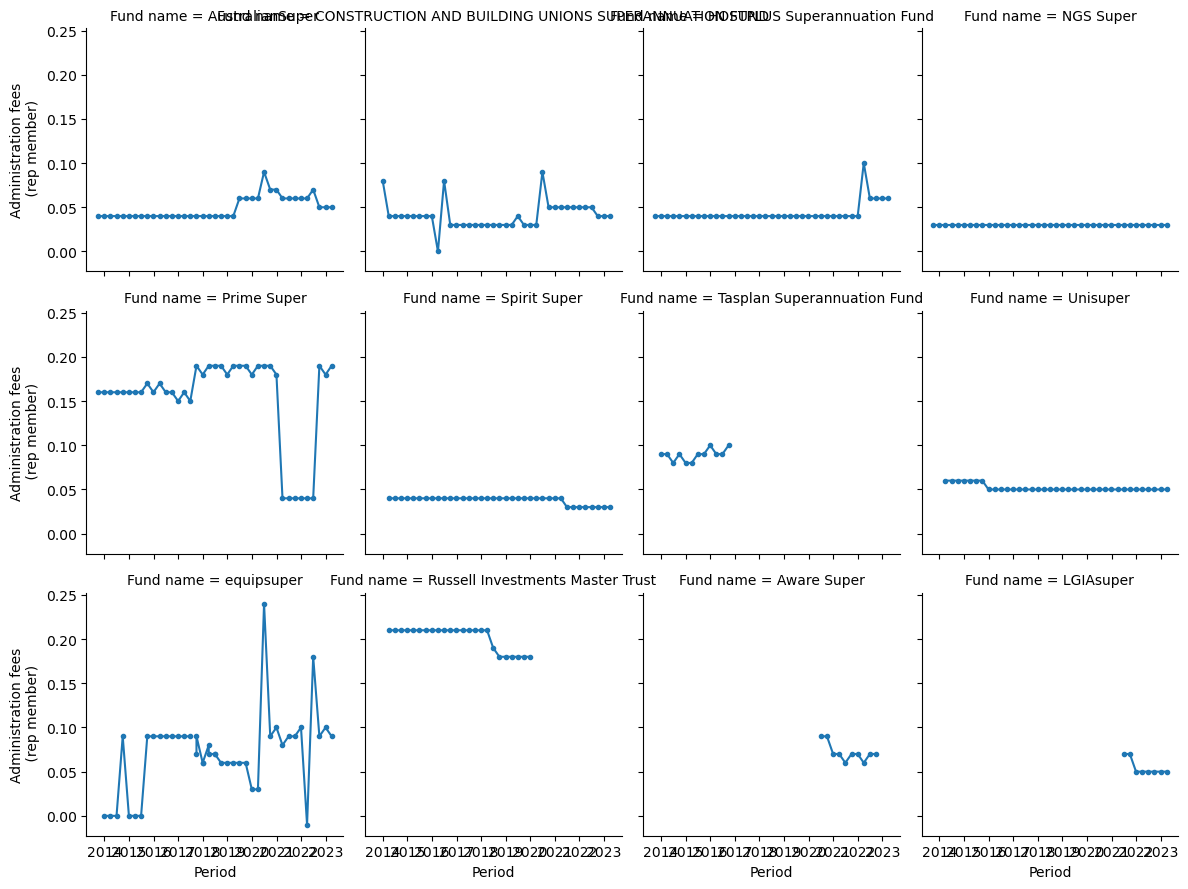

In [54]:
import seaborn as sns

g = sns.FacetGrid(filtered_fees, col="Fund name", col_wrap=4, height=3)
g = g.map(plt.plot, "Period", "Administration fees\n (rep member)", marker=".")
